In [3]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import time
import random

In [4]:
import warnings
warnings.filterwarnings('ignore')

## scraping from tripAdvisor

With the help of the BeautifulSoup library, we will access and pull out data about Phuket hotels.
Due to the limited ability to extract data without blocking, we separately consider the first 2 pages with a list of hotels. After the list of hotels has been received, we pull out reviews on the page of each hotel (where the pages are also navigated). We also introduced an artificial limit of 155 reviews for each of the hotels, so as not to get a situation where there will be a huge number of reviews for several hotels.

In [16]:
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}

r = requests.get(
    'https://www.tripadvisor.com/Hotels-g293920-oa30-zfc4,5-Phuket-Hotels.html'
, verify=False, headers=headers)



In [17]:
soup = BeautifulSoup(r.text, 'html.parser')

hotels_array = []
hotels_array2 = []

print()
for x in soup.find_all('a', {'class': 'review_count'}, href=True):
    print(x['href'])
    hotels_array.append(x['href'])
    



/Hotel_Review-g10804710-d535970-Reviews-Beyond_Resort_Karon-Karon_Beach_Karon_Phuket.html#REVIEWS
/Hotel_Review-g1210687-d447430-Reviews-The_Boathouse_Phuket-Kata_Beach_Karon_Phuket.html#REVIEWS
/Hotel_Review-g1224250-d304521-Reviews-Angsana_Laguna_Phuket-Choeng_Thale_Thalang_District_Phuket.html#REVIEWS
/Hotel_Review-g2315813-d3217202-Reviews-Pullman_Phuket_Arcadia_Naithon_Beach-Sakhu_Thalang_District_Phuket.html#REVIEWS
/Hotel_Review-g297930-d299572-Reviews-Novotel_Phuket_Resort-Patong_Kathu_Phuket.html#REVIEWS
/Hotel_Review-g297930-d6390760-Reviews-Grand_Mercure_Phuket_Patong-Patong_Kathu_Phuket.html#REVIEWS
/Hotel_Review-g1182846-d1461817-Reviews-Pullman_Phuket_Panwa_Beach_Resort-Cape_Panwa_Phuket.html#REVIEWS
/Hotel_Review-g7847985-d540134-Reviews-Katathani_Phuket_Beach_Resort-Kata_Noi_Beach_Karon_Phuket.html#REVIEWS
/Hotel_Review-g1224250-d315551-Reviews-The_Surin_Phuket-Choeng_Thale_Thalang_District_Phuket.html#REVIEWS
/Hotel_Review-g1210687-d1526109-Reviews-Novotel_Phuket_Kata

In [18]:
url = 'https://www.tripadvisor.com/'
arraycom = []
for hotel in list(set(hotels_array)):
    r = requests.get(
        url+hotel,
        verify=False,
        headers=headers
    )
    soup = BeautifulSoup(r.text, 'html.parser')
    views = min(int(soup.find('span', {'class': 'qqniT'}).text.split()[0].replace(',',"")), 150)
    for idx in range(0, views+5, 5):
        
        tmp_link = hotel.replace(
            '-Reviews-',
            f'-Reviews-or{idx}-'
        )
        link = url + tmp_link
        r = requests.get(
            link,
            verify=False,
            headers=headers
        )
        try:
            soup = BeautifulSoup(r.text, 'html.parser')
            hotel_name = soup.find('h1', {'class': 'QdLfr b d Pn'}).text
            hotel_rank = soup.find('div', {'class': 'Jktgk Mc'}).find('span', {'class': 'ui_bubble_rating'})['class'][1]
    #         print(hotel_name, hotel_rank)
            reviews = soup.find_all('div', {'class': 'YibKl MC R2 Gi z Z BB pBbQr'})[:5]
            print(f'{hotel_name}\tPage {idx/5+1}\tAll_page {views//5+1}\t{len(reviews)}')
            for review in reviews:
                review_text = review.find('div', {'class': 'fIrGe _T'}).text
                review_data = review.find('div', {'class': 'cRVSd'}).text
                review_rank = review.find('span', {'class': 'ui_bubble_rating'})['class'][1]
    #             print(review_text, review_data)
    #             print(x)
    #             print('~'*10)
                arraycom.append([
                    hotel_name,
                    hotel_rank,
                    review_text,
                    review_data,
                    review_rank,
                    link,
                    idx/5
                ])
#                 time.sleep(random.random()*2)
        except Exception as e:
            r = requests.get(
                link,
                verify=False,
                headers=headers
            )
            print(r.status_code)
            print(BeautifulSoup(r.text, 'html.parser').prettify())
            print(str(e))
            raise
#     break

Pamookkoo Resort	Page 1.0	All_page 31	5
Pamookkoo Resort	Page 2.0	All_page 31	5
Pamookkoo Resort	Page 3.0	All_page 31	5
Pamookkoo Resort	Page 4.0	All_page 31	5
Pamookkoo Resort	Page 5.0	All_page 31	5
Pamookkoo Resort	Page 6.0	All_page 31	5
Pamookkoo Resort	Page 7.0	All_page 31	4
Pamookkoo Resort	Page 8.0	All_page 31	0
Pamookkoo Resort	Page 9.0	All_page 31	0
Pamookkoo Resort	Page 10.0	All_page 31	0
Pamookkoo Resort	Page 11.0	All_page 31	0
Pamookkoo Resort	Page 12.0	All_page 31	0
Pamookkoo Resort	Page 13.0	All_page 31	0
Pamookkoo Resort	Page 14.0	All_page 31	0
Pamookkoo Resort	Page 15.0	All_page 31	0
Pamookkoo Resort	Page 16.0	All_page 31	0
Pamookkoo Resort	Page 17.0	All_page 31	0
Pamookkoo Resort	Page 18.0	All_page 31	0
Pamookkoo Resort	Page 19.0	All_page 31	0
Pamookkoo Resort	Page 20.0	All_page 31	0
Pamookkoo Resort	Page 21.0	All_page 31	0
Pamookkoo Resort	Page 22.0	All_page 31	0
Pamookkoo Resort	Page 23.0	All_page 31	0
Pamookkoo Resort	Page 24.0	All_page 31	0
Pamookkoo Resort	Page 25.

In [19]:
#Assembling the dataframe
import pandas as pd
df_com = pd.DataFrame(arraycom, columns = ['hotel_name','hotel_rank','review_text', 'review_data', 'review_rank', 'link', 'page'])

### Second page (second part)

In [20]:
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}

r = requests.get(
    'https://www.tripadvisor.com/Hotels-g293920-zfc4,5-a_ufe.true-Phuket-Hotels.html'
, verify=False, headers=headers)



In [21]:
soup = BeautifulSoup(r.text, 'html.parser')
hotels_array1 = []


print()
for x in soup.find_all('a', {'class': 'review_count'}, href=True):
    print(x['href'])
    hotels_array1.append(x['href'])
    



/Hotel_Review-g10804710-d535970-Reviews-Beyond_Resort_Karon-Karon_Beach_Karon_Phuket.html#REVIEWS
/Hotel_Review-g297930-d2542406-Reviews-Kalima_Resort_Spa_Phuket-Patong_Kathu_Phuket.html#REVIEWS
/Hotel_Review-g1210687-d308958-Reviews-Chanalai_Garden_Resort-Kata_Beach_Karon_Phuket.html#REVIEWS
/Hotel_Review-g10804710-d3399014-Reviews-Mandarava_Resort_and_Spa-Karon_Beach_Karon_Phuket.html#REVIEWS
/Hotel_Review-g297930-d315568-Reviews-Phuket_Marriott_Resort_Spa_Merlin_Beach-Patong_Kathu_Phuket.html#REVIEWS
/Hotel_Review-g1223683-d519702-Reviews-JW_Marriott_Phuket_Resort_Spa-Mai_Khao_Thalang_District_Phuket.html#REVIEWS
/Hotel_Review-g1379324-d305747-Reviews-Thavorn_Beach_Village_Resort_Spa-Kamala_Kathu_Phuket.html#REVIEWS
/Hotel_Review-g297930-d12725009-Reviews-The_Marina_Phuket_Hotel-Patong_Kathu_Phuket.html#REVIEWS
/Hotel_Review-g297930-d13140255-Reviews-Hotel_Clover_Patong_Phuket-Patong_Kathu_Phuket.html#REVIEWS
/Hotel_Review-g1210687-d1379794-Reviews-Chanalai_Romantica_Resort_Kata_Be

In [22]:
url = 'https://www.tripadvisor.com/'
arraycom1 = []
for hotel in list(set(hotels_array1)):
    r = requests.get(
        url+hotel,
        verify=False,
        headers=headers
    )
    soup = BeautifulSoup(r.text, 'html.parser')
    views = min(int(soup.find('span', {'class': 'qqniT'}).text.split()[0].replace(',',"")), 150)
    for idx in range(0, views+5, 5):
        
        tmp_link = hotel.replace(
            '-Reviews-',
            f'-Reviews-or{idx}-'
        )
        link = url + tmp_link
        r = requests.get(
            link,
            verify=False,
            headers=headers
        )
        try:
            soup = BeautifulSoup(r.text, 'html.parser')
            hotel_name = soup.find('h1', {'class': 'QdLfr b d Pn'}).text
            hotel_rank = soup.find('div', {'class': 'Jktgk Mc'}).find('span', {'class': 'ui_bubble_rating'})['class'][1]
    #         print(hotel_name, hotel_rank)
            reviews = soup.find_all('div', {'class': 'YibKl MC R2 Gi z Z BB pBbQr'})[:5]
            print(f'{hotel_name}\tPage {idx/5+1}\tAll_page {views//5+1}\t{len(reviews)}')
            for review in reviews:
                review_text = review.find('div', {'class': 'fIrGe _T'}).text
                review_data = review.find('div', {'class': 'cRVSd'}).text
                review_rank = review.find('span', {'class': 'ui_bubble_rating'})['class'][1]
    #             print(review_text, review_data)
    #             print(x)
    #             print('~'*10)
                arraycom1.append([
                    hotel_name,
                    hotel_rank,
                    review_text,
                    review_data,
                    review_rank,
                    link,
                    idx/5
                ])
#                 time.sleep(random.random()*2)
        except Exception as e:
            r = requests.get(
                link,
                verify=False,
                headers=headers
            )
            print(r.status_code)
            print(BeautifulSoup(r.text, 'html.parser').prettify())
            print(str(e))
            raise
#     break

Fishermen’s Harbour Urban Resort	Page 1.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 2.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 3.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 4.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 5.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 6.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 7.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 8.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 9.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 10.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 11.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 12.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 13.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 14.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 15.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 16.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 17.0	All_page 31	5
Fishermen’s Harbour Urban Resort	Page 18

In [23]:
import pandas as pd
df_com1 = pd.DataFrame(arraycom1, columns = ['hotel_name','hotel_rank','review_text', 'review_data', 'review_rank', 'link', 'page'])

In [24]:
# We connect 2 dataframes with hotel reviews from different pages
df=df_com.append(df_com1, ignore_index = True)  


Number of hotels:

In [25]:
len(df.hotel_name.unique())

60

In [30]:
df

,hotel_name,review_text,review_data,link,page,review_rank_new,hotel_rank_new
0,Pamookkoo Resort,I HAD A GREAT STAYING WITH THEM DURING MY VISI...,xan l wrote a review Feb 15,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,5.0,4.5
1,Pamookkoo Resort,Great place to stay! Everything is within walk...,poean wrote a review Dec 2022,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,5.0,4.5
2,Pamookkoo Resort,This is by far the worst hotel i have stayed i...,Eva R wrote a review Feb 11,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,1.0,4.5
3,Pamookkoo Resort,"We are a family of 4, 2 adults and 2 teenagers...",ClareJens wrote a review Jan 2023,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,2.0,4.5
4,Pamookkoo Resort,Heaven for family traveller's with kids.. it w...,RohitC1409 wrote a review Jan 2023,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,5.0,4.5
...,...,...,...,...,...,...,...
8993,The Shore at Katathani,It is in Phuket where we have discovered this ...,Kuk wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5
8994,The Shore at Katathani,"Let's start with Phuket, Thailand where I have...",Ms Gem wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5
8995,The Shore at Katathani,We have stayed 14 Days and enjoyed each one of...,marecker wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5
8996,The Shore at Katathani,"It was lovely: the villa with the pool, infini...",Tatiana-Maria K wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5


Handling columns for future use

In [27]:
df['review_rank_new'] = (df['review_rank'].str.split('_').str[-1].astype(str).astype(float))/10
df['hotel_rank_new'] = (df['hotel_rank'].str.split('_').str[-1].astype(str).astype(float))/10
df = df.drop(['review_rank', 'hotel_rank'], axis=1) 


## EDA (More detailed description in the report)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8998 non-null   int64  
 1   hotel_name       8998 non-null   object 
 2   review_text      8998 non-null   object 
 3   review_data      8998 non-null   object 
 4   link             8998 non-null   object 
 5   page             8998 non-null   float64
 6   review_rank_new  8998 non-null   float64
 7   hotel_rank_new   8998 non-null   float64
 8   new_rating       8998 non-null   object 
 9   words            8998 non-null   object 
 10  word_count       8998 non-null   int64  
 11  tokenized        8996 non-null   object 
 12  tokenized_words  8998 non-null   object 
 13  tokenized_v02    8998 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 984.3+ KB


In [31]:
df

,hotel_name,review_text,review_data,link,page,review_rank_new,hotel_rank_new
0,Pamookkoo Resort,I HAD A GREAT STAYING WITH THEM DURING MY VISI...,xan l wrote a review Feb 15,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,5.0,4.5
1,Pamookkoo Resort,Great place to stay! Everything is within walk...,poean wrote a review Dec 2022,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,5.0,4.5
2,Pamookkoo Resort,This is by far the worst hotel i have stayed i...,Eva R wrote a review Feb 11,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,1.0,4.5
3,Pamookkoo Resort,"We are a family of 4, 2 adults and 2 teenagers...",ClareJens wrote a review Jan 2023,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,2.0,4.5
4,Pamookkoo Resort,Heaven for family traveller's with kids.. it w...,RohitC1409 wrote a review Jan 2023,https://www.tripadvisor.com//Hotel_Review-g121...,0.0,5.0,4.5
...,...,...,...,...,...,...,...
8993,The Shore at Katathani,It is in Phuket where we have discovered this ...,Kuk wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5
8994,The Shore at Katathani,"Let's start with Phuket, Thailand where I have...",Ms Gem wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5
8995,The Shore at Katathani,We have stayed 14 Days and enjoyed each one of...,marecker wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5
8996,The Shore at Katathani,"It was lovely: the villa with the pool, infini...",Tatiana-Maria K wrote a review Oct 2021,https://www.tripadvisor.com//Hotel_Review-g784...,30.0,5.0,4.5


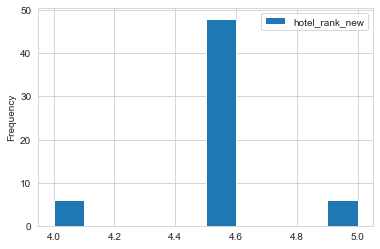

In [9]:
import matplotlib.pyplot as plt
data_plot = df[["hotel_name","hotel_rank_new"]].drop_duplicates()
data_plot_avg = data_plot.plot.hist()
plt.show()

Text(0.5, 1.0, 'Review Count by Rating')

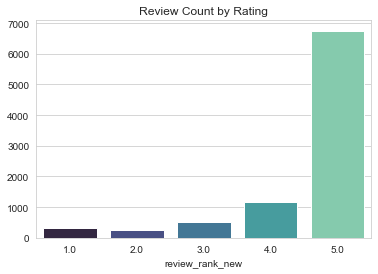

In [10]:
grouped = df.groupby('review_rank_new')['review_rank_new'].count()
sns.barplot(x = grouped.index, y = grouped.values, palette='mako').set_title('Review Count by Rating')

In [11]:
mean_rating = df.hotel_rank_new.mean()
print('The mean rating is '+ str(mean_rating))

The mean rating is 4.496110246721494


In [35]:
def new_rating(num):
    if (num == 1) or (num == 2):
        return 'poor'
    elif (num == 3) or (num == 4):
        return 'average'
    else:
        return 'excellent'

df['new_rating'] = df['review_rank_new'].apply(new_rating)

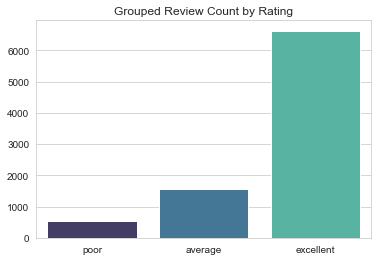

In [12]:
new_rating_grouped = df.groupby('new_rating')['review_rank_new'].count()
new_rating_grouped
ax = sns.barplot(x = ['poor','average','excellent'], y = [547, 1546, 6628], palette='mako').set_title('Grouped Review Count by Rating')

In [37]:
new_rating_grouped

new_rating
average      1673
excellent    6754
poor          571
Name: review_rank_new, dtype: int64

Text(0.5, 1.0, 'Word Count by Review')

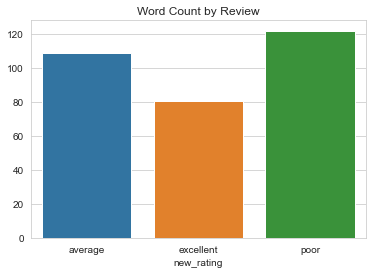

In [38]:
df['words'] = [x.split() for x in df['review_text']]
df['word_count'] = [len(x) for x in df['words']]

grouped_rating = df.groupby('new_rating')['word_count'].mean()
sns.barplot(x = grouped_rating.index, y = grouped_rating.values).set_title('Word Count by Review')

### preprocessing

For a more detailed analysis of reviews, it is necessary to bring reviews to a single style, for which we created a function that performs lemmatization, brings everything to the same case and removes punctuation and symbols. Tokenization has been performed.

In [39]:
sw = stopwords.words('english')

In [15]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [9]:
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the review corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [10]:
df['tokenized'] = df['review_text'].apply(doc_preparer)


In [11]:
import nltk
nltk.download('pos_tag')


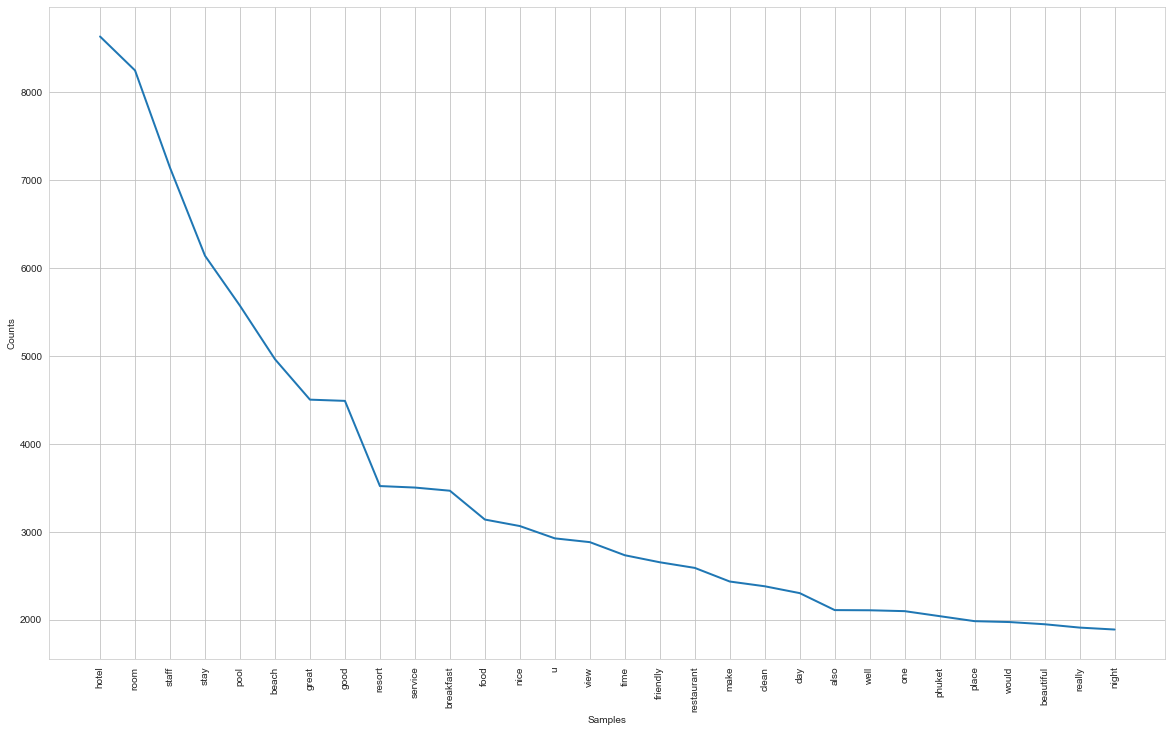

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
df['tokenized_words'] = [x.split() for x in df['tokenized']]
tokenized_words = df['tokenized_words'].to_list()

word_list = []
for x in tokenized_words:
    word_list.extend(x)
word_list
freq_dist_text = nltk.FreqDist(word_list)
plt.subplots(figsize=(20,12))
freq_dist_text.plot(30)

It is expected that the word hotel is found in almost every review. Also often people mention the facilities, the staff, the pool, the beach, the service. Indeed, these points are the main criteria by which to describe the hotel

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

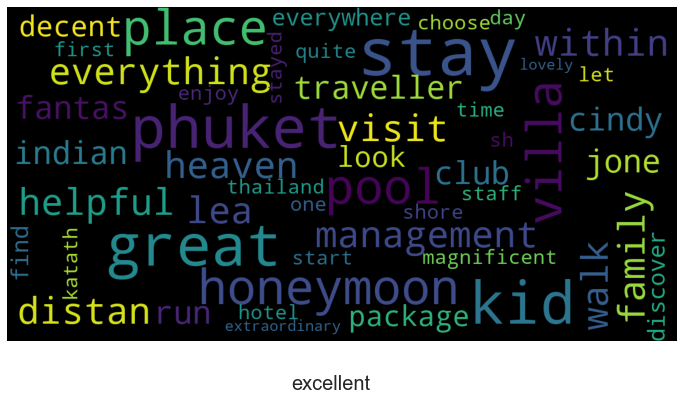

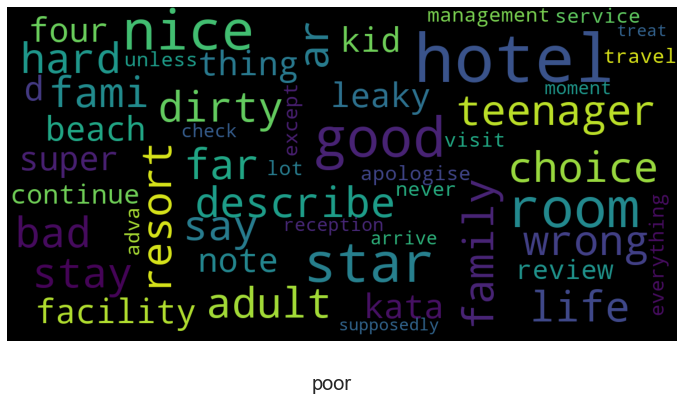

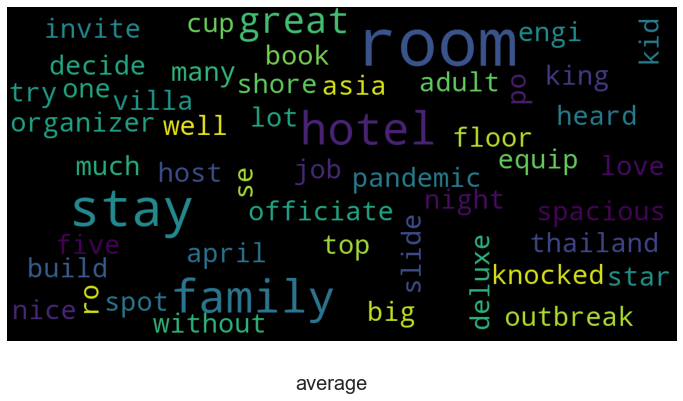

In [47]:
for rating in list(df['new_rating'].unique()):
    show_wordcloud(df[df['new_rating']==rating]['tokenized'], title=rating)

We see how the set of adjectives found in reviews changes depending on what rating it has. So, for great reviews, we see: helpful, great, magnificent. While for the poor: leaky, bad, dirty.

In [12]:
#res = list(map(str.split, df.tokenized.values))


#### Comparison of sentence structures

In [13]:
df_eda = pd.DataFrame()
df_eda['LEM']  = df.tokenized

df_eda['POS']  = df.tokenized_v02.apply(lambda x: [pos_tag[1] for pos_tag in pos_tag(x)])     #pos-tagged tokens ("bag of tags")
df_eda['NOUN'] = df_eda.POS.apply(
    lambda x: sum(1 for pos in x if pos.startswith('NN')) / len(x) if len(x) > 0 else 0)   #percentage of nouns
df_eda['ADJ']  = df_eda.POS.apply(
    lambda x: sum(1 for pos in x if pos.startswith('JJ')) / len(x) if len(x) > 0 else 0)   #percentage of adjectives
df_eda['ADV']  = df_eda.POS.apply(
    lambda x: sum(1 for pos in x if pos.startswith('RB')) / len(x) if len(x) > 0 else 0)   #percentage of adverbs
df_eda['VERB'] = df_eda.POS.apply(
    lambda x: sum(1 for pos in x if pos.startswith('VB')) / len(x) if len(x) > 0 else 0)   #percentage of verbs
# structual features
df_eda['CHAR']    = df.review_text.apply(lambda x: len(x))             #number of characters
df_eda['WORD']    = df.review_text.apply(lambda x: len(x.split(' ')))  #umber of words
df_eda['SENT']    = df.review_text.apply(lambda x: len(x.split('. '))) #number of sentences
df_eda['LEN']     = df_eda.CHAR / df_eda.WORD                                  #average word length
df_eda['AVG']     = df_eda.WORD / df_eda.SENT                                  #average sentence length
df_eda['target'] = df['new_rating']

In [56]:
df_eda

,LEM,POS,NOUN,ADJ,ADV,VERB,CHAR,WORD,SENT,LEN,AVG,target
0,great stay visit phuket management helpful lea...,"[JJ, JJ, NN, NN, NN, JJ, VBP, NN, NN, NN, NN, ...",0.560000,0.240000,0.060000,0.100000,589,109,11,5.403670,9.909091,excellent
1,great place stay everything within walk distan...,"[JJ, NN, NN, NN, IN, NN, NN, NN, NN, NN, NN, V...",0.583333,0.166667,0.041667,0.104167,491,85,5,5.776471,17.000000,excellent
2,far bad hotel stay life hard describe dirty ar...,"[RB, JJ, NN, NN, NN, JJ, NN, NN, NN, VBN, NN, ...",0.512605,0.210084,0.117647,0.100840,1309,238,17,5.500000,14.000000,poor
3,family adult teenager resort wrong choice fami...,"[NN, NN, NN, NN, JJ, NN, NN, JJ, NN, NN, NN, J...",0.581250,0.256250,0.075000,0.062500,1778,326,14,5.453988,23.285714,poor
4,heaven family traveller kid like indian jone r...,"[VBN, NN, NN, NN, IN, JJ, NN, JJ, NN, JJ, NN, ...",0.400000,0.250000,0.150000,0.125000,393,70,9,5.614286,7.777778,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
8993,phuket discover magnificent hotel shore katath...,"[NN, NN, JJ, NN, NN, NN, NN, JJ, NN, NN, NN, V...",0.585366,0.243902,0.097561,0.073171,457,77,7,5.935065,11.000000,excellent
8994,let start phuket thailand quite time choose sh...,"[VB, VB, NN, NN, RB, NN, JJ, NN, NN, VB, RB, R...",0.444444,0.244444,0.177778,0.111111,497,95,5,5.231579,19.000000,excellent
8995,stayed day enjoy one first staff extraordinary...,"[VBN, NN, VB, CD, JJ, NN, JJ, JJ, NN, VBP, IN,...",0.441176,0.264706,0.029412,0.176471,382,72,7,5.305556,10.285714,excellent
8996,lovely villa pool infinity pool beach mind oct...,"[RB, JJ, NN, NN, NN, NN, IN, JJ, NN, NN, NN, J...",0.512821,0.153846,0.076923,0.153846,427,78,2,5.474359,39.000000,excellent


In [55]:
df_eda.to_csv('df_uda.csv', sep='\t')

In [6]:
#df=pd.read_csv('df_uda.csv', sep='\t')  

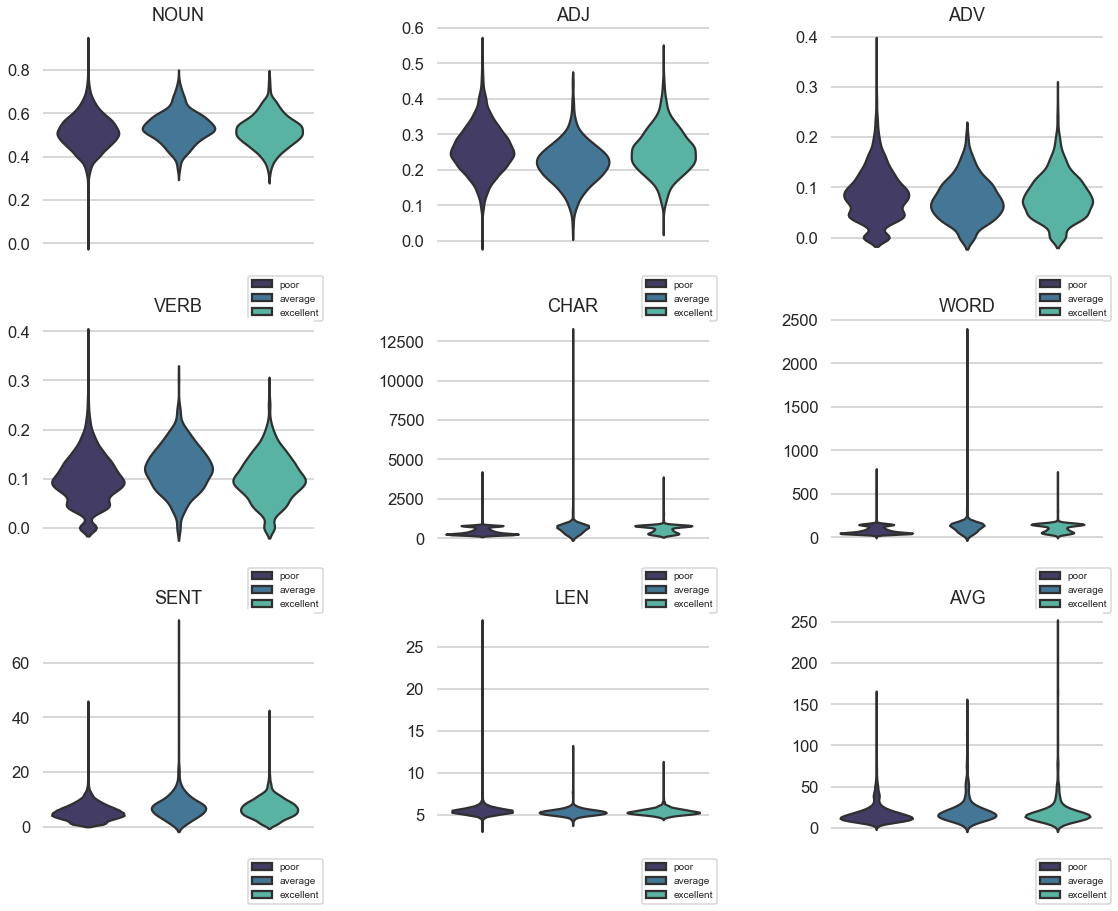

In [57]:

cols = ['TARGET','LEM','NOUN','ADJ','ADV','VERB','CHAR', 'WORD','SENT','LEN','AVG']

# plot feature distributions for helpful and unhelpful reviews
sns.set_style('whitegrid')
sns.set_context("talk")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(19,15), facecolor='w')
plt.subplots_adjust(wspace=.45, hspace=.25)
sns.despine(bottom = True, left = True)


r = c = 0
for col in cols[2:]:
    sns.violinplot(data=df_eda, y=df_eda[col], x=df_eda.target,
                   ax=ax[r][c], legend_out = True,
                   inner=None, palette='mako').set_title(col)
    
# ax[r][c].set_ylim(ymin=None, ymax=df[col].quantile(.995))
    ax[r][c].set_xticks([])
    ax[r][c].set_xlabel('')
    ax[r][c].set_ylabel('')
    ax[r][c].legend(labels=['poor','average','excellent'], bbox_to_anchor=(1.05, -0.05), prop={'size':10})


    if c < 2:
        c += 1
    else:
        r += 1
        c = 0


# plt.savefig(fname='images/density', bbox_inches='tight', pad_inches=0.1)
plt.show()

The plot above shows the various parts of speech and other review characteristics per each target category. A key takeaway to note, is that the word count, character count, and average length of sentence is higher for 'poor' reviews compared to others.
In terms of percentages, there is no strong obvious difference, the poor almost everywhere have more elongated "tails", that is, more emissions, but this is probably due to the small proportion of this class compared to others.

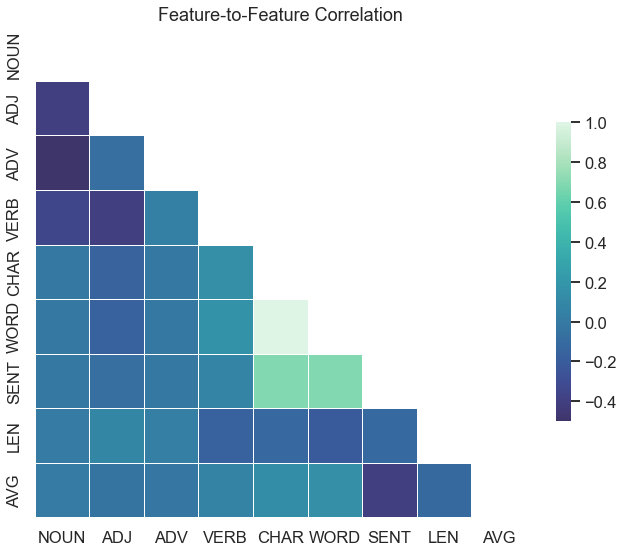

In [58]:
# plot pairwise correlations
sns.set_style('white')
sns.set_palette('dark:salmon')
sns.set_context("talk")

plt.figure(figsize=(11,11), facecolor='w')

sns.heatmap(
    df_eda.corr(),
    mask=np.triu(np.ones_like(df_eda.corr(), dtype=bool)),
    vmin=-0.5, vmax=1, center=0,
    square=True,
    linewidths=1,
    cmap="mako",
    cbar_kws={"shrink": 0.5}).set_title('Feature-to-Feature Correlation')

plt.show()